In [1]:
# Имя набор данных построить аппроксимационную модель
# Хьюбер, Тюки - функция потерь - это робастость
# Квадрат если небольшое
# Линия если больше
# Константа
# 2 - регуляризация L1, L2, SVD
# 3 - робастость

In [2]:
# 4 Лаб работа - сплайны. Натуральный сплайн
# 4 Лаб работа - сплайны. Робастный сглаживающий сплайн

In [3]:
!python -m pip install matplotlib numpy

You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
from sys import float_info

import numpy as np
from numpy.linalg import solve

def ordinary_least_squares(x: np.ndarray, y: np.ndarray, order: int,
        p: int = 0, alpha: float = 1.0, eps: float = 1E-8, max_iter: int = 100):
    if (not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray)
            or not isinstance(order, int) or not isinstance(p, int)
            or not isinstance(alpha, float) or not isinstance(eps, float)
            or not isinstance(max_iter, int)):
        raise TypeError()
    if (len(x.shape) != 1 or len(y.shape) != 1 or x.shape != y.shape
            or order < 2 or p not in range(3) or alpha < 0
            or eps < float_info.epsilon or max_iter < 1):
        raise ValueError()

    n = len(x)
    x_upper = np.vander(x, order + 1, increasing=False)
    left, right = x_upper.T @ x_upper, x_upper.T @ y
    print('Condition number =', np.linalg.cond(left))

    if p == 2:
        left += alpha * np.eye(order + 1)
        print('L2: Condition number =', np.linalg.cond(left))
    if p != 1:
        return solve(left, right)

    for _ in range(max_iter):
        next_a = solve(left, right)
    return 5, next_a

In [5]:
from math import cos, sin, sqrt

def f(x: float) -> float:
    # return x + 10 * sin(x / 10.0) + 15 * sin(x / 5) + 20 * sin(x / 2)
    return x**2 - 10 * sin(13.0 / 11.0 * x) - sqrt(7.0 / 3.0 * x)

start, stop, extended = 0, 17, 5
x = np.linspace(start, stop, 2 ** 6)
extended_x = np.linspace(start - extended, stop + extended, 2 ** 20)
f_vectorize = np.vectorize(f)
y = f_vectorize(x)

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y, color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

<Figure size 6400x3600 with 1 Axes>

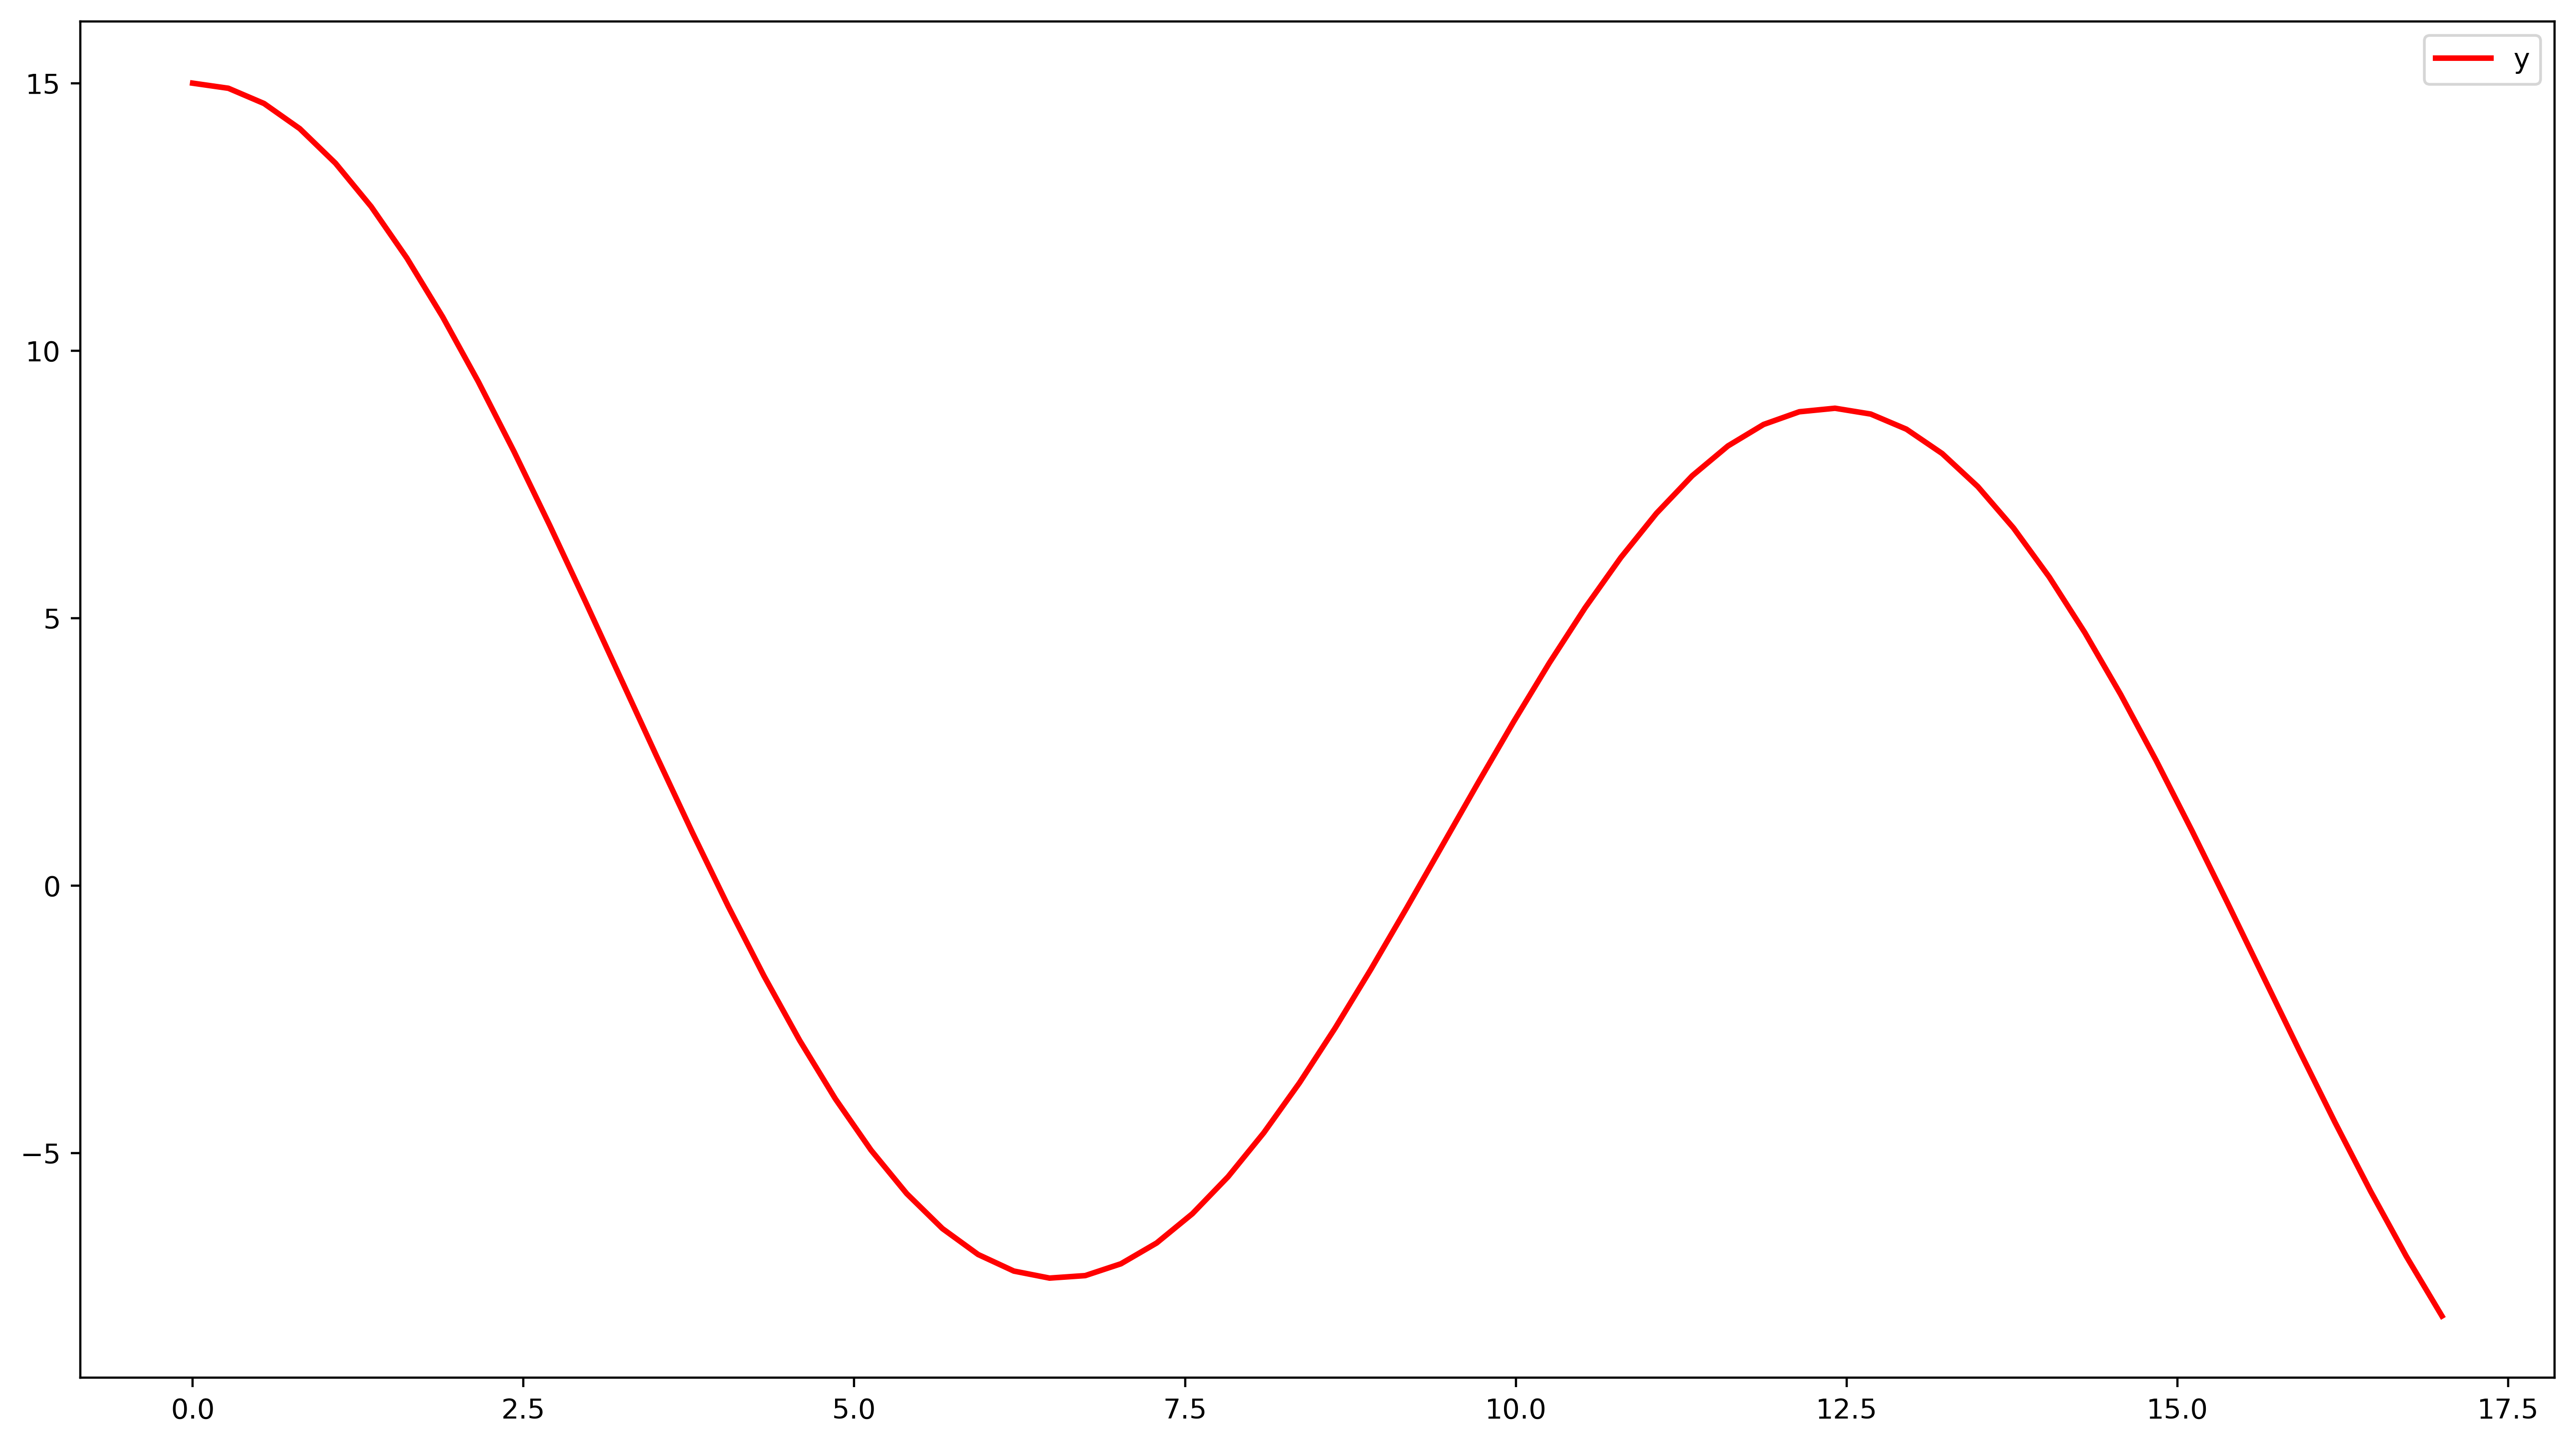

In [7]:
def f_prime(x: float) -> float:
    return 1 + cos(x / 10) + 3 * cos(x / 5) + 10 * cos(x / 2)

f_prime_vectorize = np.vectorize(f_prime)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, f_prime_vectorize(x), color = 'red', lw = 2, label = 'y')
plt.legend()
plt.show()

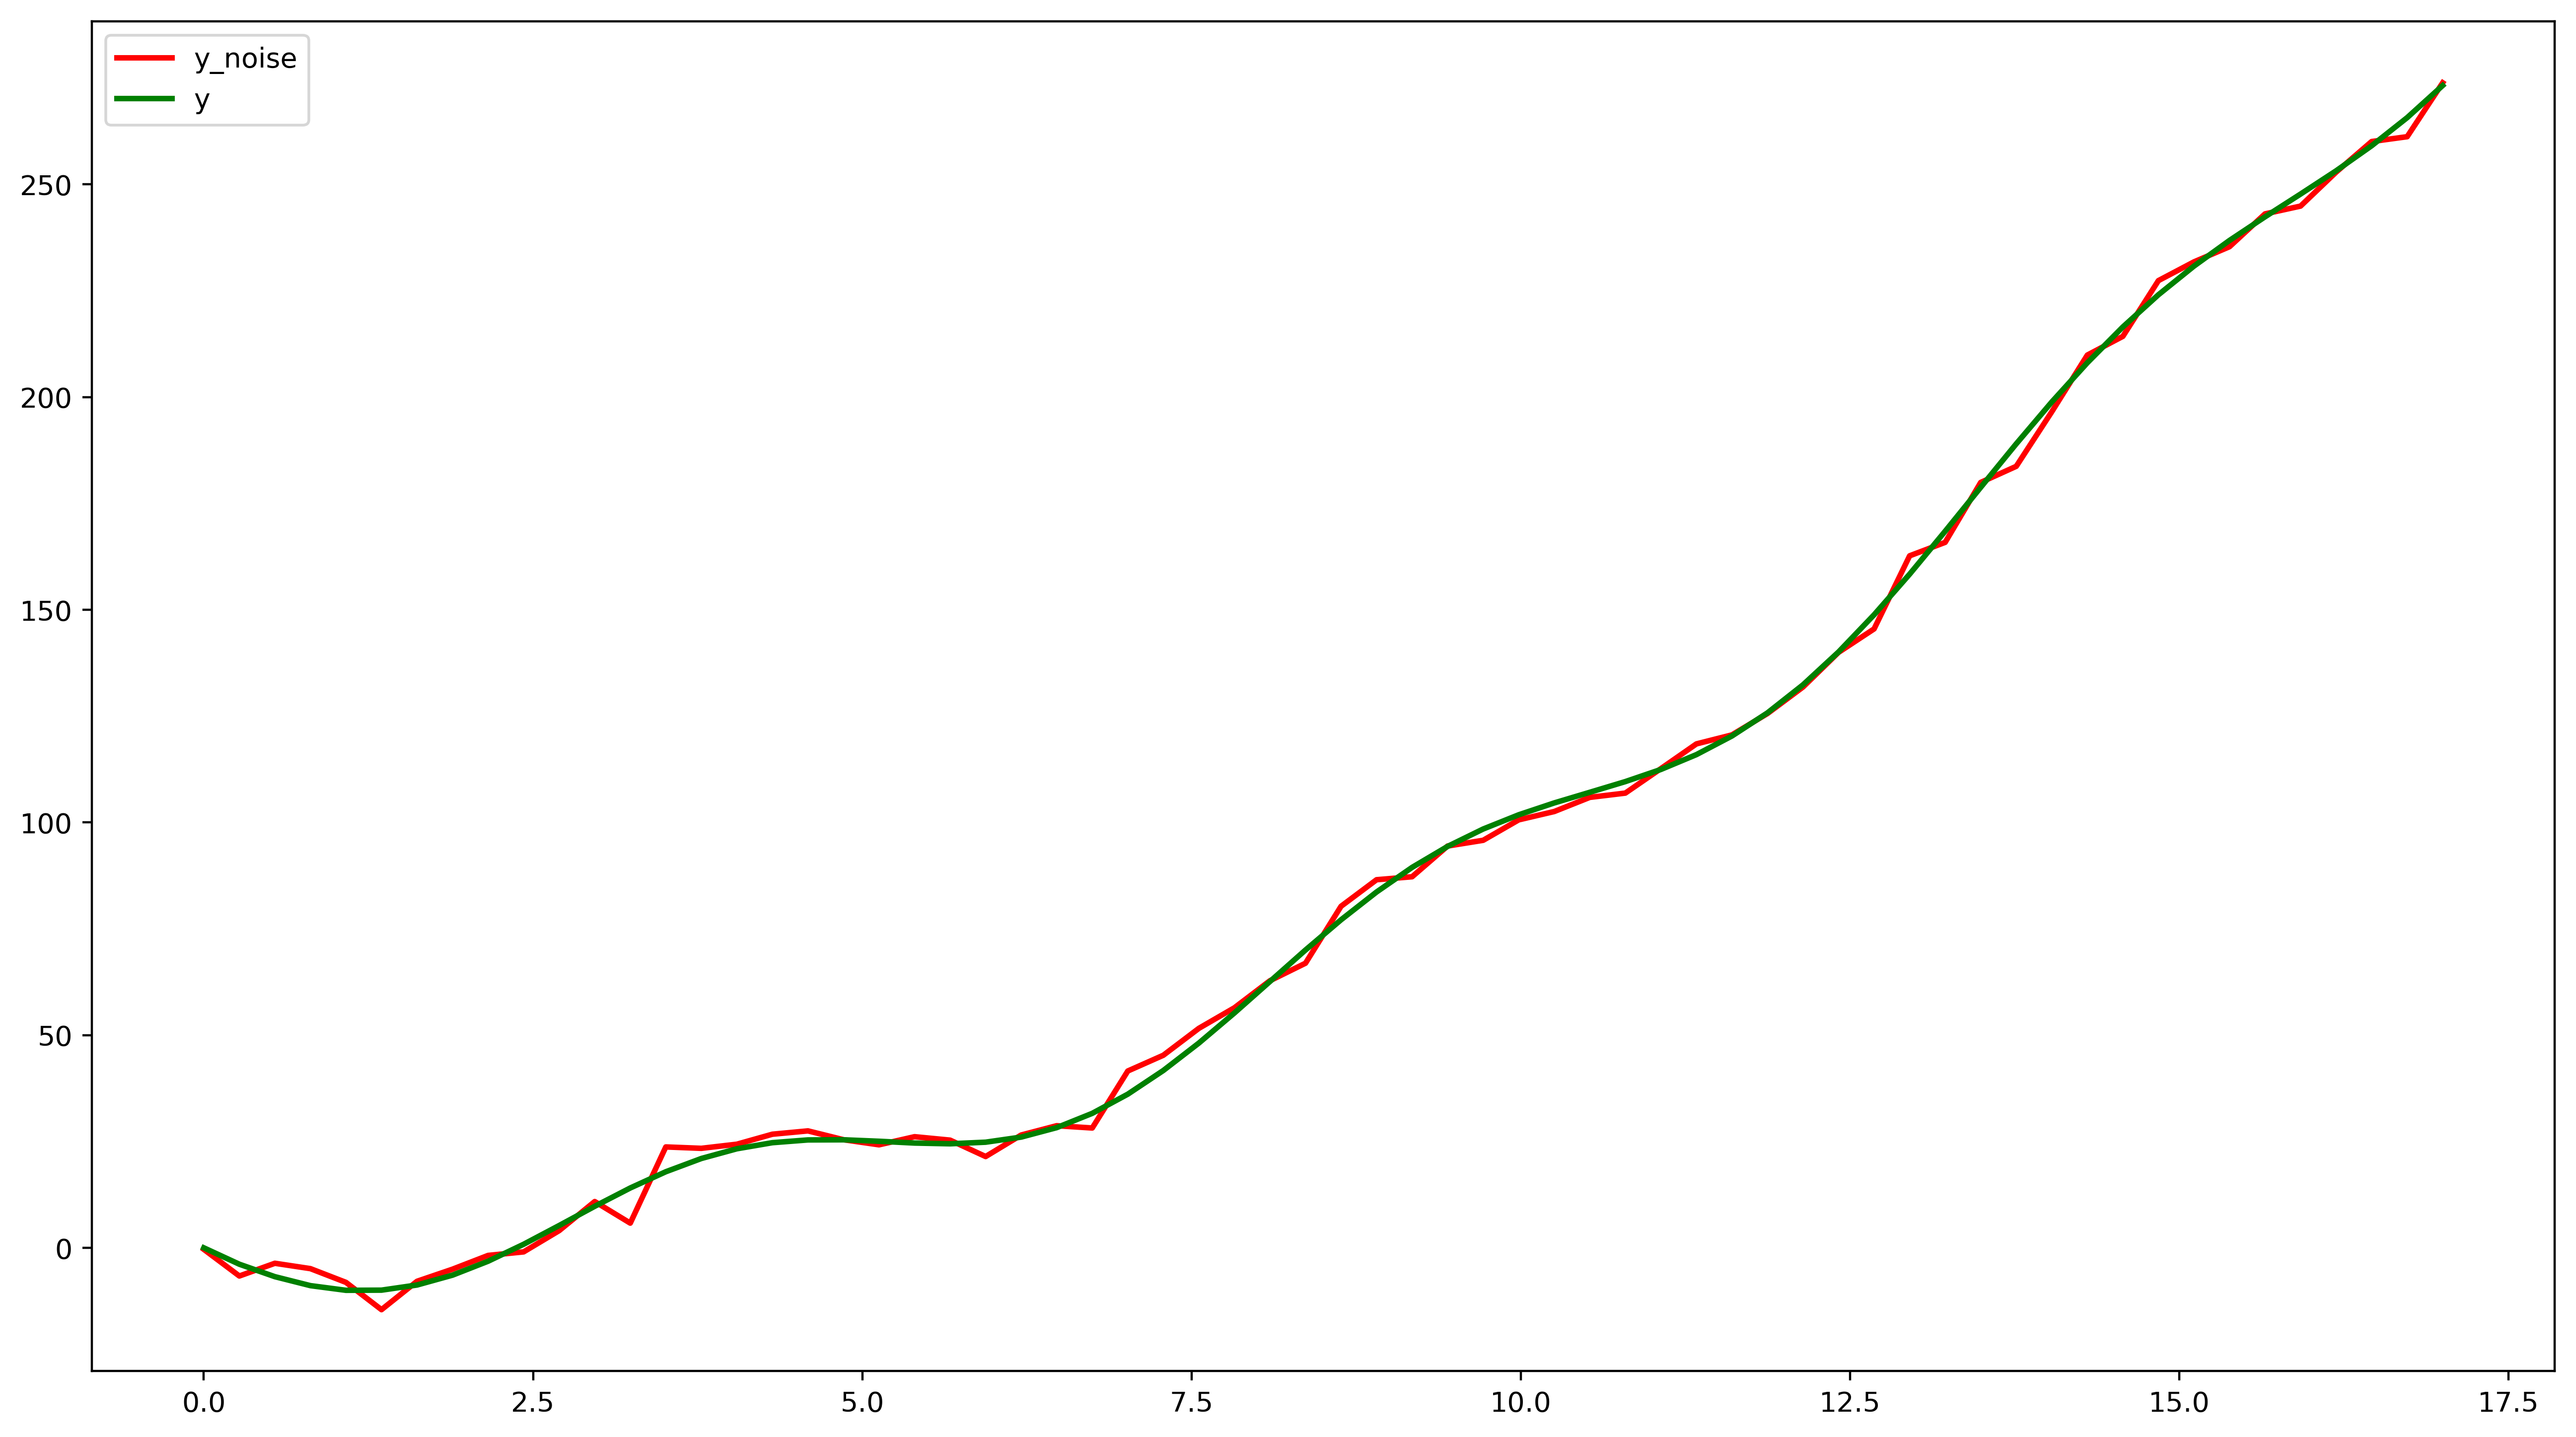

In [8]:
from numpy.random import normal

y_noise = y + normal(loc=0, scale=3.0, size=len(y))
fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')
plt.legend()
plt.show()

Condition number = 153559.8878337834


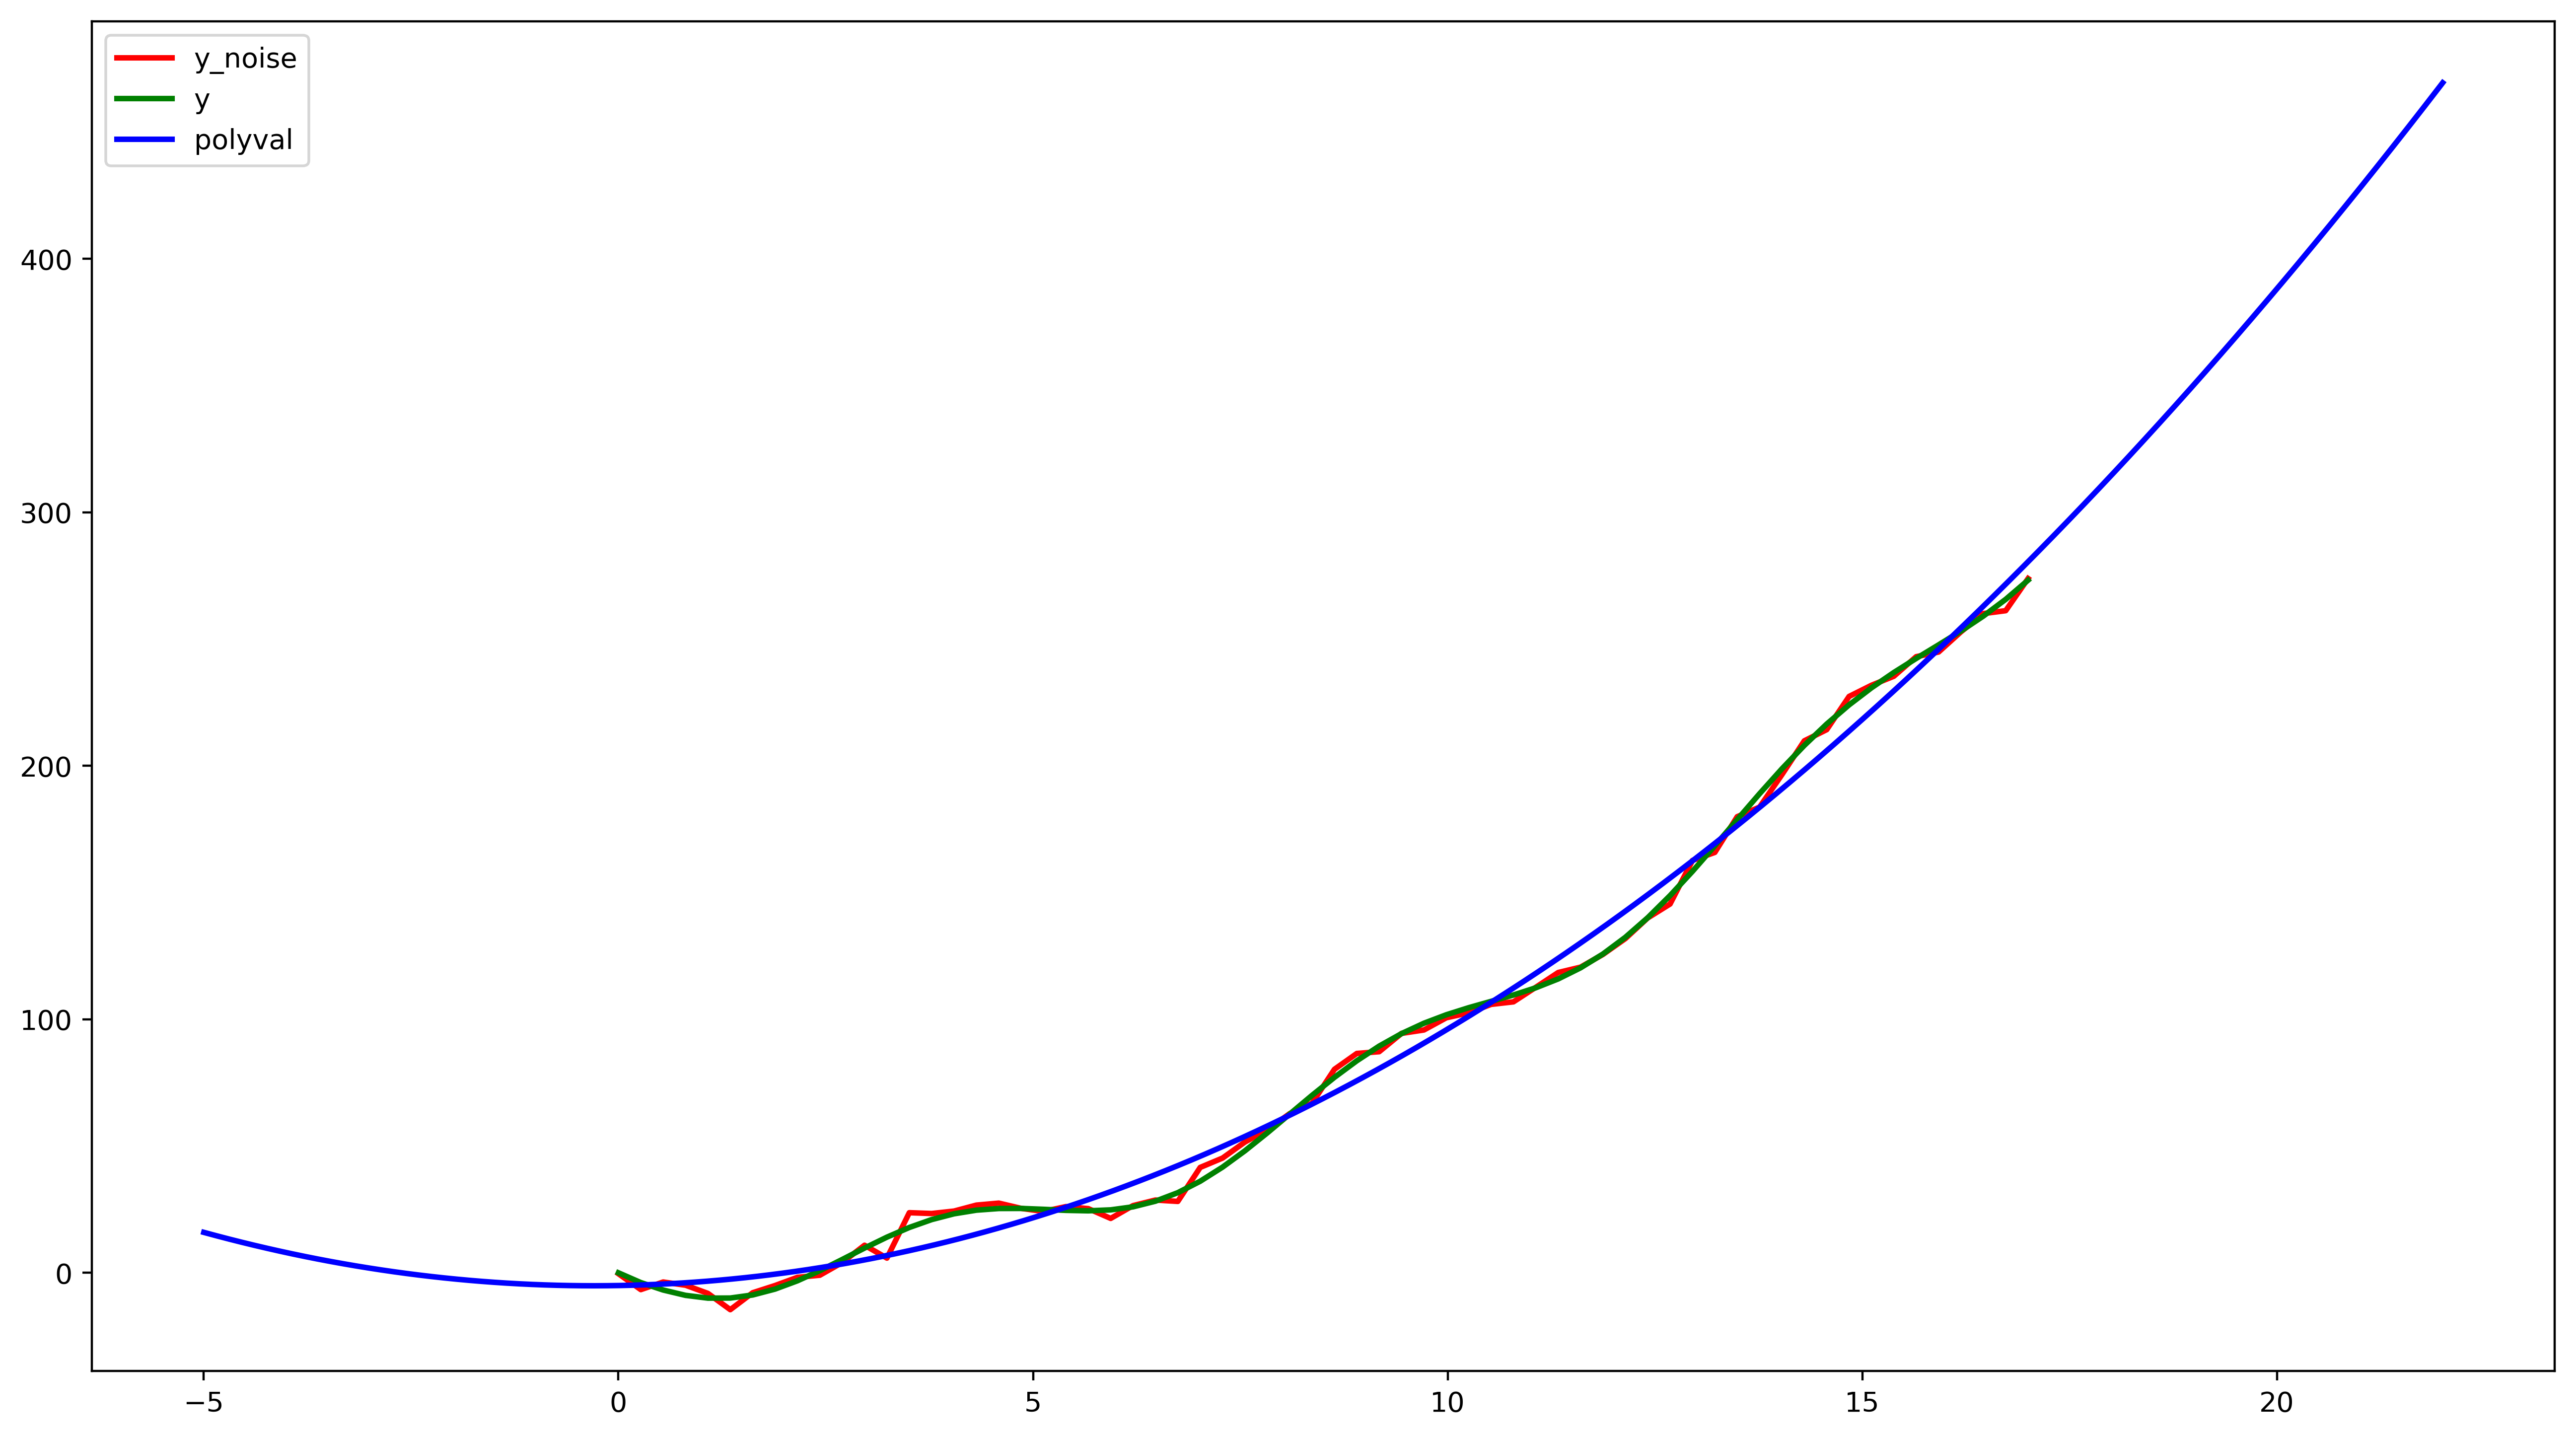

[ 0.95418018  0.57537493 -5.02231896]


In [9]:
poly = ordinary_least_squares(x, y_noise, order=2, p=0, alpha=0.0)
polyval = np.polyval(poly, extended_x)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')
subplot.plot(extended_x, polyval, color = 'blue', lw = 2, label = 'polyval')
plt.legend()
plt.show()
print(poly)

Condition number = 13486803596820.021


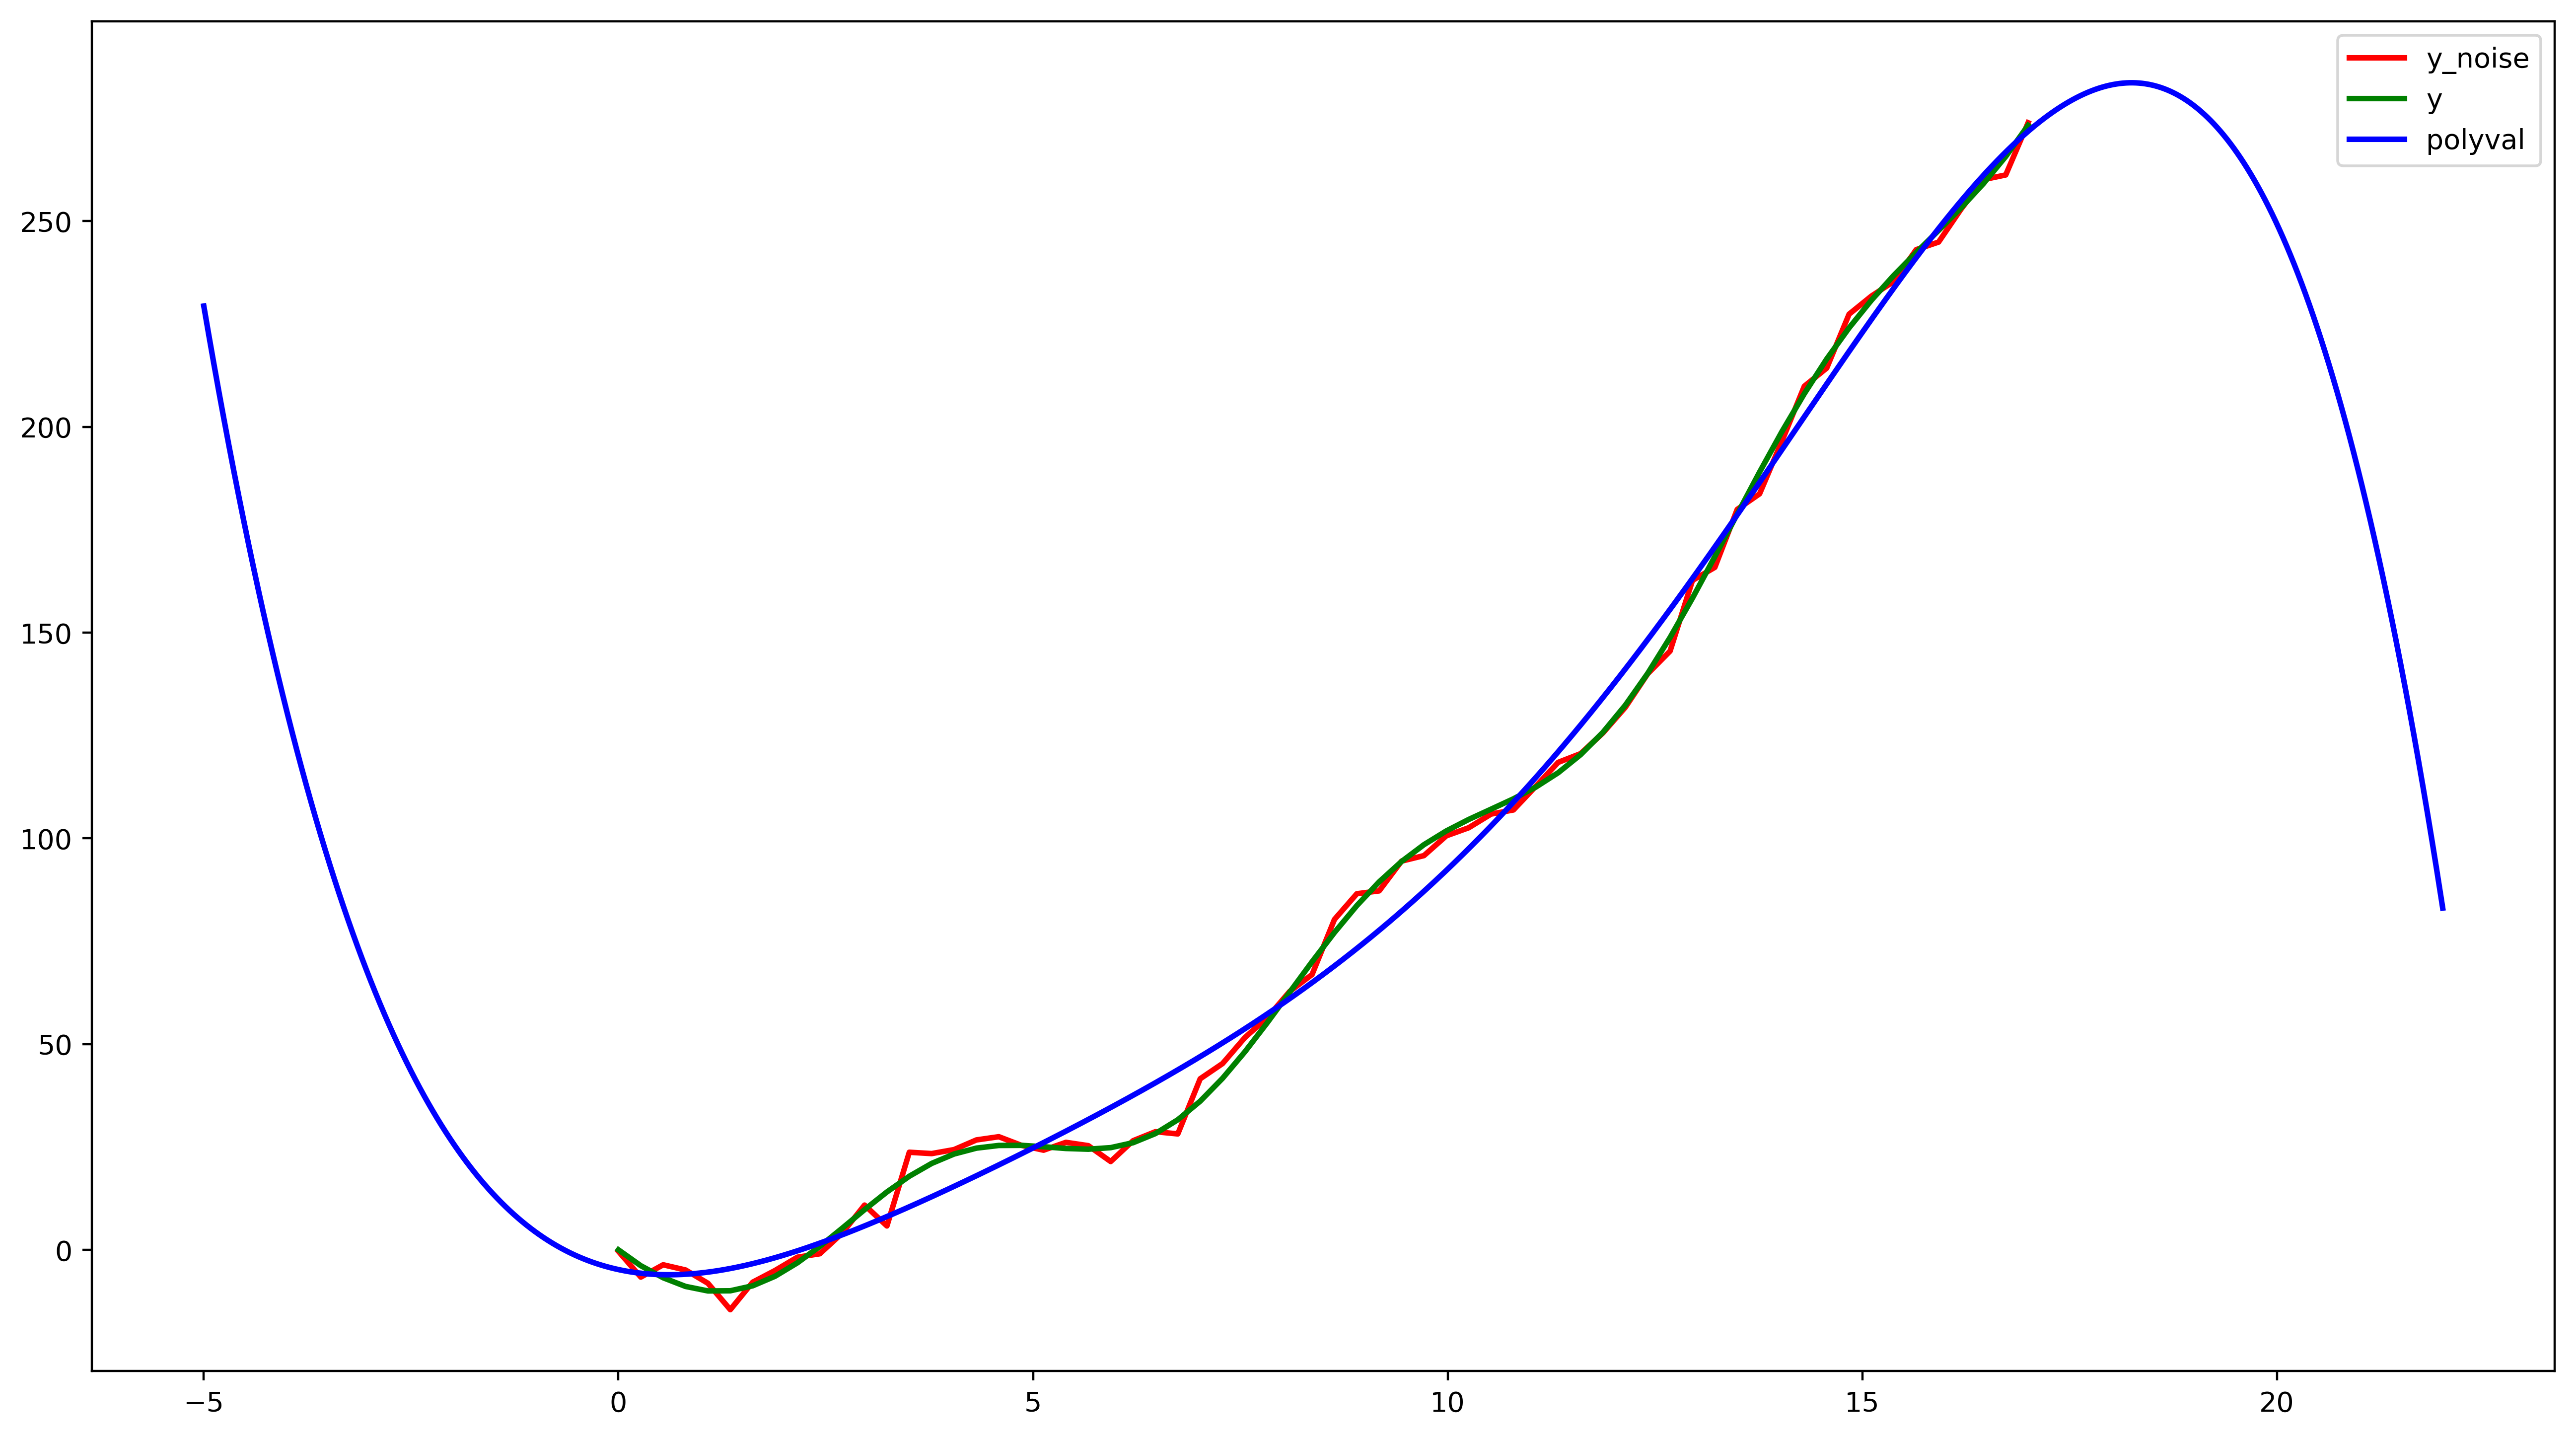

[-1.17652659e-03  4.60797429e-02 -6.14413181e-01  4.12192285e+00
 -4.36235145e+00 -4.79526194e+00]


In [10]:
poly = ordinary_least_squares(x, y_noise, order=5, p=0, alpha=0.0)
polyval = np.polyval(poly, extended_x)

fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')
subplot.plot(extended_x, polyval, color = 'blue', lw = 2, label = 'polyval')
plt.legend()
plt.show()
print(poly)

Condition number = 13486803596820.021
L2: Condition number = 13443746199427.035
[-1.17602872e-03  4.60579716e-02 -6.14075172e-01  4.11973716e+00
 -4.35732430e+00 -4.79651748e+00]
Condition number = 13486803596820.021
L2: Condition number = 13068255759976.727
[-1.17162507e-03  4.58655178e-02 -6.11090059e-01  4.10046854e+00
 -4.31321084e+00 -4.80701667e+00]
Condition number = 13486803596820.021
L2: Condition number = 10215121981148.61
[-1.13351178e-03  4.42082558e-02 -5.85594153e-01  3.93843897e+00
 -3.95749248e+00 -4.85299205e+00]
Condition number = 13486803596820.021
L2: Condition number = 3209017572282.957
[-9.26917047e-04  3.54079609e-02 -4.54768229e-01  3.16252855e+00
 -2.58908401e+00 -4.15019338e+00]
Condition number = 13486803596820.021
L2: Condition number = 408346680525.78284
[-4.58313273e-04  1.58674045e-02 -1.74208997e-01  1.61157849e+00
 -4.90274336e-01 -1.28589495e+00]
Condition number = 13486803596820.021
L2: Condition number = 41978573647.61884
[-5.95298170e-05  2.69037295

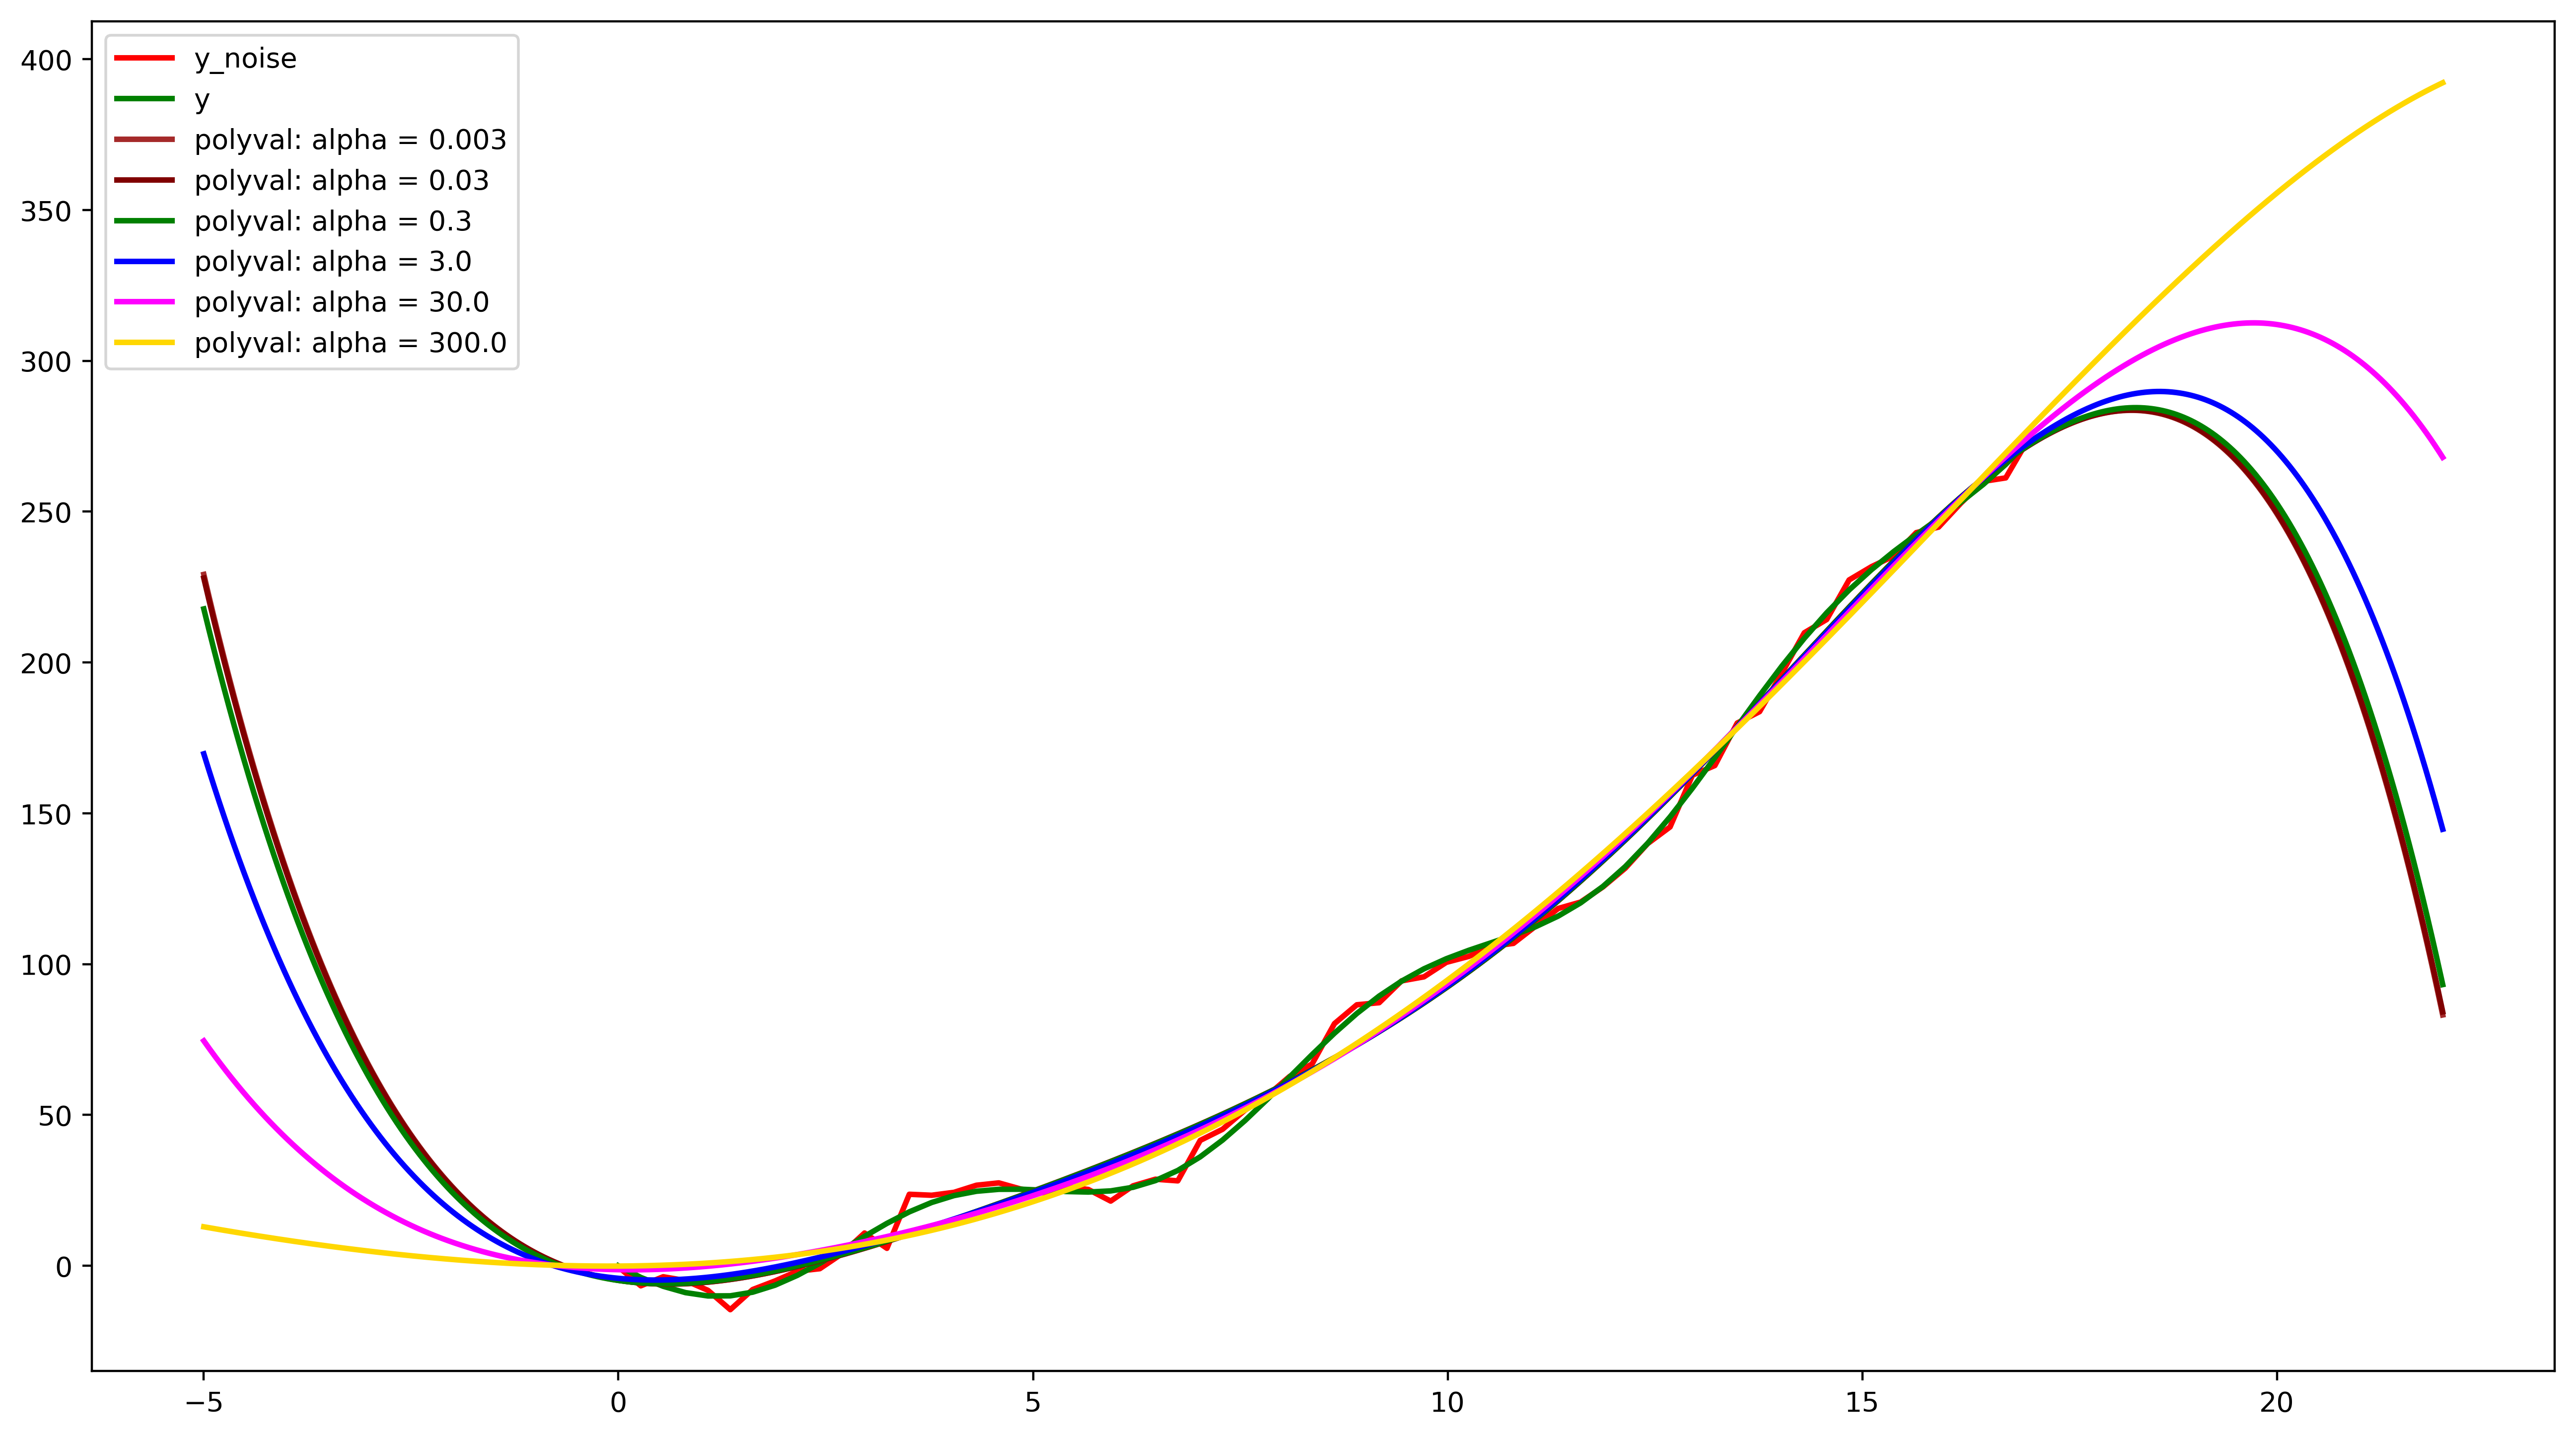

In [14]:
colors = ['brown', 'maroon', 'green', 'blue', 'magenta', 'gold']
fig = plt.figure(figsize=(16, 9), dpi=400)
subplot = fig.add_subplot(111, facecolor = '#FFFFFF')
subplot.plot(x, y_noise, color = 'red', lw = 2, label = 'y_noise')
subplot.plot(x, y, color = 'green', lw = 2, label = 'y')

for i in range(6):
    alpha = 0.003 * (10 ** i)
    poly = ordinary_least_squares(x, y_noise, order=5, p=2, alpha=alpha)
    polyval = np.polyval(poly, extended_x)

    subplot.plot(extended_x, polyval, color = colors[i], lw = 2, label = 'polyval: alpha = ' + str(alpha))
    print(poly)

plt.legend()
plt.show()